<a href="https://colab.research.google.com/github/hjn14133/Machine-Learning/blob/main/ExtraTreesRegression_yield_EC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Initial Setup
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
from sklearn import metrics

In [2]:
# Read in data and display first 5 rows
df = pd.read_csv('FT_EC_SP_JOIN_2020.csv')

In [3]:
# Load data set
X = df[['Elevation', 'AppliedRat', 'EC_0_2', 'DISTANCE_1', 'Heading_1']]
y1 = df['VRYIELDBAL']
y2 = df['Loan_Rat']

print('The shape of our features is:', X.shape)

The shape of our features is: (5720, 5)


In [4]:
# Descriptive statistics for each column
X.describe()

,Elevation,AppliedRat,EC_0_2,DISTANCE_1,Heading_1
count,5720.000000,5720.000000,5720.000000,5720.000000,5720.000000
mean,165.194536,25863.892487,5.015344,6.860106,94.270339
std,1.881384,4915.607774,1.456430,0.897423,97.592399
min,160.791272,0.000000,1.660000,0.449588,0.001562
25%,163.822608,22565.271410,4.030000,6.901559,0.378750
50%,165.165567,24807.229870,4.900000,6.978460,1.050156
75%,166.551927,30371.657450,5.880000,7.032793,180.325234
max,169.551115,76489.633240,11.140000,14.165783,359.992157


In [5]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_x, test_x, train_y1, test_y1 = train_test_split(X, y1, test_size = 0.2,
                                                      random_state = 42)

In [32]:
from sklearn import ensemble
model = ensemble.ExtraTreesRegressor(random_state=0)

In [38]:
model.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [33]:
model.fit(train_x, train_y1)

ExtraTreesRegressor(random_state=0)

In [34]:
# predict the results
y_pred=model.predict(test_x)

In [35]:
print('Training Coefficient of R^2 : %.3f'%model.score(train_x, train_y1))
print('Test Coefficient of R^2 : %.3f'%model.score(test_x, test_y1))

Training Coefficient of R^2 : 1.000
Test Coefficient of R^2 : 0.689


In [40]:
# Calculate the absolute errors
errors = abs(y_pred - test_y1)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), '.')


# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_y1)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.41 .
Accuracy: 71.19 %.


In [41]:
# Print result of MAE
print('MAE: ', metrics.mean_absolute_error(test_y1, y_pred))


# Print result of RMSE
print('RMSE: ', np.sqrt(metrics.mean_squared_error(test_y1, y_pred)))

MAE:  0.4083315324587412
RMSE:  0.5887789991279022


In [36]:
#plot the importances #
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1][:20]
x_values = list(range(len(importances)))
feature_list = list(X.columns)

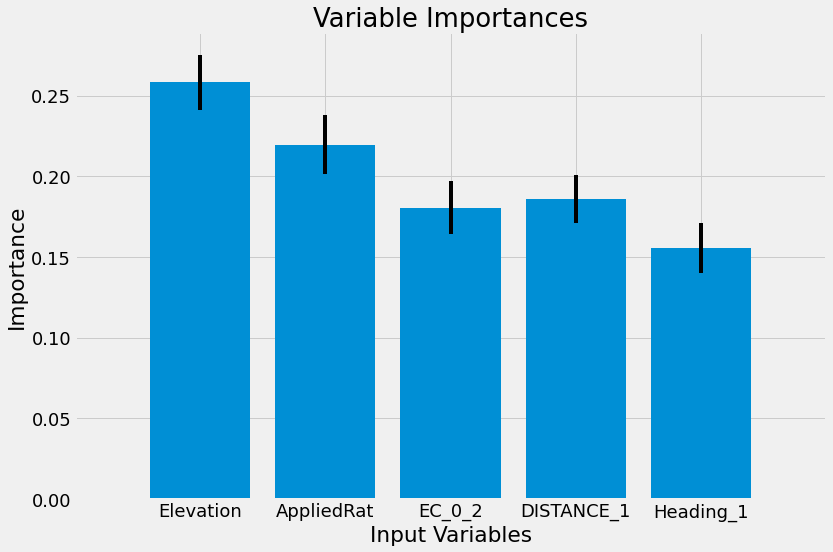

In [39]:
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(12,8))
#plt.title("Feature importances")
#plt.bar(x_values, importances[indices], color="b", yerr=std[indices], align="center")
#plt.xticks(x_values, indices)

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', yerr=std[indices])
# Tick labels for x axis
plt.xticks(x_values, feature_list)

plt.xlim([-1, len(indices)])
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Input Variables'); plt.title('Variable Importances');

In [18]:
from sklearn import model_selection
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed,
                              shuffle = True)
model = ensemble.ExtraTreesRegressor(n_estimators=5, max_depth=10, 
                                     max_features=0.3, n_jobs=-1, 
                                     random_state=0)
results = model_selection.cross_val_score(model, train_x, train_y1, cv=kfold)
print(results.mean())

0.21106922340236905


{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': 0.3,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 5,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

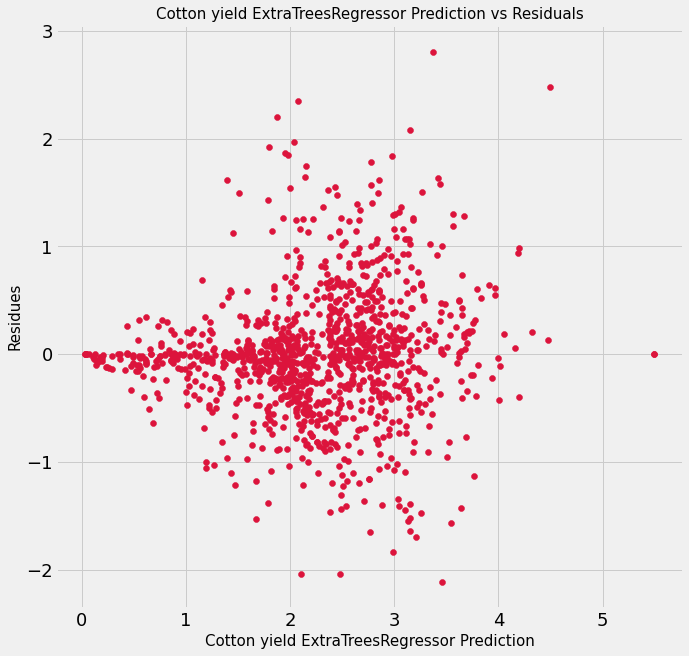

In [42]:
# Plot actual data and predictions 

plt.figure(figsize=(10,10))
plt.scatter(y_pred, (test_y1-y_pred), c='crimson')

#plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('Cotton yield ExtraTreesRegressor Prediction vs Residuals', fontsize=15)
plt.xlabel('Cotton yield ExtraTreesRegressor Prediction', fontsize=15)
plt.ylabel('Residues', fontsize=15)
plt.show()